In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

In [122]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, univariate_selection, RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [4]:
df = pd.read_csv('ibm1.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884.0,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613.0,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155.0,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023.0,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df['Attrition']=pd.Series(np.where(df.Attrition.values == 'Yes', 1, 0))

In [6]:
df = df.drop(['EmployeeCount','StandardHours'], axis=1).copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373.0,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591.0,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
one_hot_cols=['BusinessTravel','Department','EducationField','Gender','JobRole','OverTime']

# Pipeline

In [9]:
logit = LogisticRegression(random_state=2021)
smote = SMOTE()

In [10]:
dtc = DecisionTreeClassifier(max_depth=8, random_state=2021)

# Nama Fitur

In [11]:
test_list1=df.columns.tolist()
test_list1

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [12]:
test_list2=one_hot_cols.copy()
test_list2

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime']

In [13]:
test_list3='DailyRate', 'HourlyRate','MaritalStatus','MonthlyIncome','JobLevel','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'

In [14]:
test_list2.extend(test_list3)
test_list2

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime',
 'DailyRate',
 'HourlyRate',
 'MaritalStatus',
 'MonthlyIncome',
 'JobLevel',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
test_list2

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime',
 'DailyRate',
 'HourlyRate',
 'MaritalStatus',
 'MonthlyIncome',
 'JobLevel',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [16]:
res = [ele for ele in test_list1] 
res

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
for a in test_list2: 
    if a in test_list1: 
        res.remove(a) 

In [18]:
res

['Age',
 'Attrition',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [19]:
contoh=[]
gakada=[]
for a in test_list2:
    if a in test_list1: 
        contoh.append(a)
    else:
        gakada.append(a)


In [20]:
contoh

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime',
 'DailyRate',
 'HourlyRate',
 'MaritalStatus',
 'MonthlyIncome',
 'JobLevel',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [21]:
res

['Age',
 'Attrition',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [22]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in res:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [23]:
summary_sisa=report(df)

In [24]:
summary_sisa

,Column,d_type,unique_sample,n_uniques
0,Age,int64,"[41, 49, 37, 33, 27]",43
1,Attrition,int32,"[1, 0]",2
2,DistanceFromHome,int64,"[1, 8, 2, 3, 24]",29
3,Education,int64,"[2, 1, 4, 3, 5]",5
4,EmployeeNumber,int64,"[1, 2, 4, 5, 7]",1470
5,EnvironmentSatisfaction,int64,"[2, 3, 4, 1]",4
6,JobInvolvement,int64,"[3, 2, 4, 1]",4
7,JobSatisfaction,int64,"[4, 2, 3, 1]",4
8,MonthlyRate,int64,"[19479, 24907, 2396, 23159, 16632]",1427
9,NumCompaniesWorked,int64,"[8, 1, 6, 9, 0]",10


In [25]:
summary_sisa[summary_sisa['d_type']=='int64']['Column']

0                          Age
2             DistanceFromHome
3                    Education
4               EmployeeNumber
5      EnvironmentSatisfaction
6               JobInvolvement
7              JobSatisfaction
8                  MonthlyRate
9           NumCompaniesWorked
11           PercentSalaryHike
12           PerformanceRating
13    RelationshipSatisfaction
14            StockOptionLevel
15           TotalWorkingYears
16       TrainingTimesLastYear
17             WorkLifeBalance
Name: Column, dtype: object

# PipeLine

In [26]:
logit_pipe_pca1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

logit_pipe_pca2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

logit_pipe_num_im = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

logit_pipe_cat_im = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

logit_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

#transformer
logit_transformer = ColumnTransformer([
    ('pipe_num_im', logit_pipe_num_im, ['DailyRate', 'HourlyRate']),
    ('pipe_cat_im', logit_pipe_cat_im, ['MaritalStatus']),
    ('pipe_cat', logit_pipe_cat, one_hot_cols),
    ('pipe_pca1',logit_pipe_pca1,['MonthlyIncome','JobLevel']),
    ('pipe_pca2',logit_pipe_pca1,['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
])

# combine all pipeline
logit_pipe_combine = Pipeline([
    ('transformer', logit_transformer),
    ('rfe', RFE(logit)),
    ('resampling', smote),
    ('logit', logit)
])

In [27]:
dtc_pipe_pca1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

dtc_pipe_pca2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

dtc_pipe_num_im = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

dtc_pipe_cat_im = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

dtc_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

#transformer
dtc_transformer = ColumnTransformer([
    ('pipe_num_im', dtc_pipe_num_im, ['DailyRate', 'HourlyRate']),
    ('pipe_cat_im', dtc_pipe_cat_im, ['MaritalStatus']),
    ('pipe_cat', dtc_pipe_cat, one_hot_cols),
    ('pipe_pca1',dtc_pipe_pca1,['MonthlyIncome','JobLevel']),
    ('pipe_pca2',dtc_pipe_pca1,['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
])

#dtc
dtc_pipe_combine = Pipeline([
    ('transformer', dtc_transformer),
    ('rfe', RFE(dtc)),
    ('resampling', smote),
    ('dtc', dtc)
])

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn_pipe_combine = Pipeline([
    ('transformer', dtc_transformer),
    ('resampling', smote),
    ('knn', knn)
])

# Data Splitting

In [30]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=2021) #check random_state

# Modelling

## LogisticRegression

In [31]:
logit = LogisticRegression(random_state=2021)

In [32]:
skfold = StratifiedKFold(n_splits = 5, random_state=2021,shuffle=True)
logit_bench_cv = cross_val_score(logit_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [33]:
logit_bench_cv

array([0.76315789, 0.57894737, 0.68421053, 0.65789474, 0.73684211])

In [34]:
logit_bench_cv.mean()

0.6842105263157895

## dtc

In [35]:
dtc_bench_cv = cross_val_score(dtc_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [36]:
dtc_bench_cv

array([0.52631579, 0.44736842, 0.34210526, 0.36842105, 0.44736842])

In [37]:
dtc_bench_cv.mean()

0.42631578947368415

# KNN

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
knn_bench_cv = cross_val_score(knn_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [40]:
knn_bench_cv

array([0.63157895, 0.65789474, 0.44736842, 0.5       , 0.65789474])

In [41]:
knn_bench_cv.mean()

0.5789473684210527

# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

Pipeline

In [43]:
nb_pipe_pca1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

nb_pipe_pca2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

nb_pipe_num_im = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

nb_pipe_cat_im = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

nb_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

#transformer
nb_transformer = ColumnTransformer([
    ('pipe_num_im', nb_pipe_num_im, ['DailyRate', 'HourlyRate']),
    ('pipe_cat_im', nb_pipe_cat_im, ['MaritalStatus']),
    ('pipe_cat', nb_pipe_cat, one_hot_cols),
    ('pipe_pca1',nb_pipe_pca1,['MonthlyIncome','JobLevel']),
    ('pipe_pca2',nb_pipe_pca1,['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
])

#dtc
nb_pipe_combine = Pipeline([
    ('transformer', nb_transformer),
    ('resampling', smote),
    ('naive', gnb)
])

In [44]:
gnb_bench_cv = cross_val_score(nb_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [45]:
gnb_bench_cv

array([0.84210526, 0.84210526, 0.89473684, 0.76315789, 0.86842105])

In [46]:
gnb_bench_cv.mean()

0.8421052631578947

# Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators=100)

In [48]:
rf_pipe_pca1 = Pipeline([
    ('pca', PCA(n_components=1))
])

rf_pipe_pca2 = Pipeline([
    ('pca', PCA(n_components=2))
])

rf_pipe_num_im = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan))
])

rf_pipe_cat_im = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

rf_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

#transformer
rf_transformer = ColumnTransformer([
    ('pipe_num_im', rf_pipe_num_im, ['DailyRate', 'HourlyRate']),
    ('pipe_cat_im', rf_pipe_cat_im, ['MaritalStatus']),
    ('pipe_cat', rf_pipe_cat, one_hot_cols),
    ('pipe_pca1',rf_pipe_pca1,['MonthlyIncome','JobLevel']),
    ('pipe_pca2',rf_pipe_pca1,['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
])

#dtc
rf_pipe_combine = Pipeline([
    ('transformer', rf_transformer),
    ('randomforest', rf)
])

rf_pipe_combine_fi = Pipeline([
    ('transformer', rf_transformer),
    ('randomforest', rf)
])

In [49]:
rf_bench_cv = cross_val_score(rf_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [50]:
rf_bench_cv

array([0.21052632, 0.15789474, 0.13157895, 0.21052632, 0.15789474])

In [51]:
rf_bench_cv.mean()

0.1736842105263158

### Feature Importance Random Forest

In [52]:
rf_pipe_combine_fi.fit(X_train_val, y_train_val)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehot',
                     

In [53]:
rf_pipe_combine.steps[1]

('randomforest', RandomForestClassifier())

In [54]:
onehot_columns_name=rf_pipe_combine.named_steps['transformer'].named_transformers_['pipe_cat'].named_steps['onehot'].get_feature_names(input_features=one_hot_cols)

In [55]:
list(onehot_columns_name)

['BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'OverTime_Yes']

In [56]:
transformer_column_name=['DailyRate', 'HourlyRate','MaritalStatus','BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'OverTime_Yes',
 'pca1',
 'pca2_1','pca2_2']

In [57]:
transformer_column_name

['DailyRate',
 'HourlyRate',
 'MaritalStatus',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'OverTime_Yes',
 'pca1',
 'pca2_1',
 'pca2_2']

In [58]:
rf_pipe_combine.steps[1][1]

RandomForestClassifier()

In [59]:
rf_pipe_combine.steps[1][1].feature_importances_

array([0.14564883, 0.1292522 , 0.02119607, 0.03278124, 0.02921182,
       0.01758789, 0.011913  , 0.0115534 , 0.02080151, 0.00996819,
       0.02046321, 0.00709213, 0.01734396, 0.02758185, 0.00634169,
       0.02233841, 0.00338244, 0.00692168, 0.00293131, 0.01436176,
       0.01213496, 0.01276838, 0.06988253, 0.18760131, 0.15894021])

In [60]:
feature_importance_rf = pd.Series(data= rf_pipe_combine.steps[1][1].feature_importances_, index = np.array(transformer_column_name))
feature_importance_rf

DailyRate                            0.145649
HourlyRate                           0.129252
MaritalStatus                        0.021196
BusinessTravel_Travel_Frequently     0.032781
BusinessTravel_Travel_Rarely         0.029212
Department_Research & Development    0.017588
Department_Sales                     0.011913
EducationField_Life Sciences         0.011553
EducationField_Marketing             0.020802
EducationField_Medical               0.009968
EducationField_Other                 0.020463
EducationField_Technical Degree      0.007092
Gender_Male                          0.017344
JobRole_Human Resources              0.027582
JobRole_Laboratory Technician        0.006342
JobRole_Manager                      0.022338
JobRole_Manufacturing Director       0.003382
JobRole_Research Director            0.006922
JobRole_Research Scientist           0.002931
JobRole_Sales Executive              0.014362
JobRole_Sales Representative         0.012135
OverTime_Yes                      

In [61]:
nama_fitur = {'feature_importance': transformer_column_name,
        'value': rf_pipe_combine.steps[1][1].feature_importances_
        }

df_feature_importance_rf = pd.DataFrame(nama_fitur, columns = ['feature_importance', 'value'])
df_feature_importance_rf

,feature_importance,value
0,DailyRate,0.145649
1,HourlyRate,0.129252
2,MaritalStatus,0.021196
3,BusinessTravel_Travel_Frequently,0.032781
4,BusinessTravel_Travel_Rarely,0.029212
5,Department_Research & Development,0.017588
6,Department_Sales,0.011913
7,EducationField_Life Sciences,0.011553
8,EducationField_Marketing,0.020802
9,EducationField_Medical,0.009968


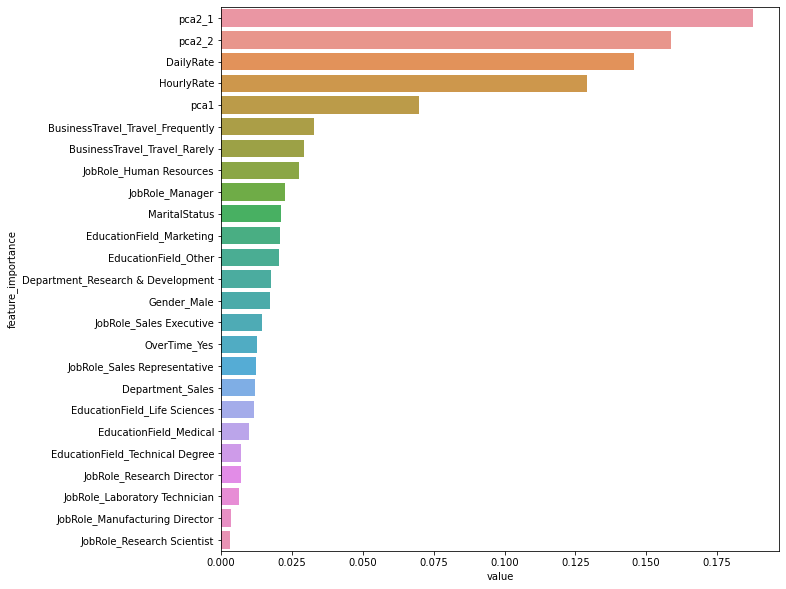

In [62]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="value", y="feature_importance", data=df_feature_importance_rf.sort_values(by='value', ascending=False),orient='h')
plt.show()

# MODELING BENCHMARK 

In [63]:
logit_pipe_combine

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']

In [64]:
model_logit_default = logit_pipe_combine.fit(X_train_val, y_train_val)
y_pred_logit_default = model_logit_default.predict(X_test) 

In [66]:
def make_confusion_matrix(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_df = pd.DataFrame(
        {'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp]}, index = ['a_0', 'a_1', 'total_prediction']
    )
    conf_df['total_actual'] = conf_df['p_0'] + conf_df['p_1']
    return conf_df

In [65]:
print(classification_report(y_test, y_pred_logit_default))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       247
           1       0.30      0.68      0.42        47

    accuracy                           0.70       294
   macro avg       0.61      0.69      0.61       294
weighted avg       0.82      0.70      0.74       294



In [67]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_default))

,p_0,p_1,total_actual
a_0,173,74,247
a_1,15,32,47
total_prediction,188,106,294


## Logit Tuned

In [68]:
logit_params = {
    'logit__C': [100,10,1,0.1,0.01,0.001],
    'logit__solver': ['lbfgs', 'liblinear', 'newton-cg']
}

In [69]:
gridsearch = GridSearchCV(logit_pipe_combine, logit_params, scoring='recall', cv=skfold)
gridsearch.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['DailyRate',
                                                                          'HourlyRate']),
                                                                        ('pipe_cat_im',
                                                                         Pipeline(steps=[('imp

In [70]:
gridsearch.best_params_

{'logit__C': 0.001, 'logit__solver': 'liblinear'}

In [71]:
logit_tuned = gridsearch.best_estimator_
logit_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']

In [72]:
model_logit_tuned=logit_tuned.fit(X_train_val, y_train_val)
y_pred_logit_tuned= model_logit_tuned.predict(X_test) 

In [73]:
print(classification_report(y_test, y_pred_logit_tuned))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57       247
           1       0.20      0.77      0.32        47

    accuracy                           0.48       294
   macro avg       0.55      0.59      0.45       294
weighted avg       0.79      0.48      0.53       294



In [74]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_tuned))

,p_0,p_1,total_actual
a_0,104,143,247
a_1,11,36,47
total_prediction,115,179,294


# KNN Benchmark

In [95]:
model_knn_default=knn_pipe_combine.fit(X_train_val, y_train_val)
y_pred_knn_default= model_knn_default.predict(X_test) 

In [96]:
print(classification_report(y_test, y_pred_knn_default))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       247
           1       0.27      0.62      0.37        47

    accuracy                           0.67       294
   macro avg       0.58      0.65      0.57       294
weighted avg       0.80      0.67      0.71       294



In [97]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_knn_default))

,p_0,p_1,total_actual
a_0,167,80,247
a_1,18,29,47
total_prediction,185,109,294


# KNN Tuned

In [75]:
knn_params={
    'knn__n_neighbors':[3,5,7,9,11,15,19],
    'knn__weights':['uniform','distance'],
    'knn__metric':['minkowski','euclidean','manhattan']
}

In [76]:
gridsearch_knn = GridSearchCV(knn_pipe_combine, knn_params, scoring='recall', cv=skfold)
gridsearch_knn.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['DailyRate',
                                                                          'HourlyRate']),
                                                                        ('pipe_cat_im',
                                                                         Pipeline(steps=[('imp

In [77]:
gridsearch_knn.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}

In [78]:
knn_tuned = gridsearch_knn.best_estimator_
knn_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']

In [79]:
model_knn_tuned=knn_tuned.fit(X_train_val, y_train_val)
y_pred_knn_tuned= model_knn_tuned.predict(X_test) 

In [80]:
print(classification_report(y_test, y_pred_knn_tuned))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73       247
           1       0.27      0.74      0.39        47

    accuracy                           0.63       294
   macro avg       0.60      0.68      0.56       294
weighted avg       0.82      0.63      0.68       294



In [81]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_knn_tuned))

,p_0,p_1,total_actual
a_0,150,97,247
a_1,12,35,47
total_prediction,162,132,294


KNN Tuned Recall 1: 0.74

# Naive Bayes Benchmark

In [99]:
model_nb_default=nb_pipe_combine.fit(X_train_val, y_train_val)
y_pred_nb_default= model_nb_default.predict(X_test) 

In [100]:
print(classification_report(y_test, y_pred_nb_default))

              precision    recall  f1-score   support

           0       0.89      0.35      0.50       247
           1       0.18      0.77      0.30        47

    accuracy                           0.41       294
   macro avg       0.53      0.56      0.40       294
weighted avg       0.77      0.41      0.47       294



In [101]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_nb_default))

,p_0,p_1,total_actual
a_0,86,161,247
a_1,11,36,47
total_prediction,97,197,294


In [98]:
nb_pipe_combine

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']

# Random Forest Benchmark

In [103]:
model_rf_default=rf_pipe_combine.fit(X_train_val, y_train_val)
y_pred_rf_default= model_rf_default.predict(X_test) 

In [104]:
print(classification_report(y_test, y_pred_rf_default))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.72      0.28      0.40        47

    accuracy                           0.87       294
   macro avg       0.80      0.63      0.66       294
weighted avg       0.85      0.87      0.84       294



In [105]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_default))

,p_0,p_1,total_actual
a_0,242,5,247
a_1,34,13,47
total_prediction,276,18,294


# Random Forest Weighted

In [134]:
rf_class_weight=dict({0:1.5,1:10})

In [135]:
rf_weight = RandomForestClassifier(n_estimators=100,class_weight=rf_class_weight)

In [136]:
rf_pipe_combine_weight = Pipeline([
    ('transformer', rf_transformer),
    ('randomforest_weight', rf_weight)
])

In [137]:
model_rf_weight_default=rf_pipe_combine_weight.fit(X_train_val, y_train_val)
y_pred_rf_default_weight= model_rf_weight_default.predict(X_test) 

In [138]:
print(classification_report(y_test, y_pred_rf_default_weight))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.86      0.26      0.39        47

    accuracy                           0.87       294
   macro avg       0.87      0.62      0.66       294
weighted avg       0.87      0.87      0.84       294



In [112]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_default_weight))

,p_0,p_1,total_actual
a_0,244,3,247
a_1,36,11,47
total_prediction,280,14,294


# Balanced Random Forest

In [117]:
brf=BalancedRandomForestClassifier(n_estimators=100,random_state=2021)

In [143]:
brf_pipe_combine = Pipeline([
    ('transformer', rf_transformer),
    ('balanced_rf', brf)
])

CV

In [144]:
brf_bench_cv = cross_val_score(brf_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [145]:
brf_bench_cv

array([0.65789474, 0.71052632, 0.78947368, 0.71052632, 0.73684211])

In [146]:
brf_bench_cv.mean()

0.7210526315789474

In [119]:
model_brf_default=brf_pipe_combine.fit(X_train_val, y_train_val)
y_pred_brf_default= model_brf_default.predict(X_test) 

In [120]:
print(classification_report(y_test, y_pred_brf_default))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       247
           1       0.29      0.68      0.41        47

    accuracy                           0.69       294
   macro avg       0.61      0.68      0.60       294
weighted avg       0.82      0.69      0.73       294



In [121]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_brf_default))

,p_0,p_1,total_actual
a_0,170,77,247
a_1,15,32,47
total_prediction,185,109,294


## BRF Tuned

In [153]:
brf_params={'balanced_rf__min_samples_split': [2, 5, 10],
 'balanced_rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [154]:
gridsearch_brf = GridSearchCV(brf_pipe_combine, brf_params, scoring='recall', cv=skfold)
gridsearch_brf.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['DailyRate',
                                                                          'HourlyRate']),
                                                                        ('pipe_cat_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                      

In [155]:
gridsearch_brf.best_params_

{'balanced_rf__min_samples_split': 2, 'balanced_rf__n_estimators': 1000}

In [156]:
brf_tuned = gridsearch_brf.best_estimator_

In [157]:
model_brf_tuned=brf_tuned.fit(X_train_val, y_train_val)
y_pred_brf_tuned= model_brf_tuned.predict(X_test) 

In [158]:
print(classification_report(y_test, y_pred_brf_tuned))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       247
           1       0.31      0.66      0.42        47

    accuracy                           0.71       294
   macro avg       0.62      0.69      0.62       294
weighted avg       0.82      0.71      0.75       294



# Bagging

CV

In [129]:
bbc=BalancedBaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(random_state=2021),
        n_estimators=100,
        random_state=2021)

In [130]:
bbc_pipe_combine= Pipeline([
    ('transformer', rf_transformer),
    ('balanced_rf', bbc)
])

In [139]:
bbc_bench_cv = cross_val_score(bbc_pipe_combine, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [140]:
bbc_bench_cv

array([0.63157895, 0.63157895, 0.65789474, 0.57894737, 0.65789474])

In [141]:
bbc_bench_cv.mean()

0.631578947368421

In [132]:
model_bbc_default=bbc_pipe_combine.fit(X_train_val, y_train_val)
y_pred_bbc_default= model_bbc_default.predict(X_test) 

In [133]:
print(classification_report(y_test, y_pred_bbc_default))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       247
           1       0.36      0.60      0.45        47

    accuracy                           0.77       294
   macro avg       0.64      0.70      0.65       294
weighted avg       0.82      0.77      0.79       294



## Bagging Tuned

In [164]:
bbc_params = {
 'balanced_rf__bootstrap': [True, False],
 'balanced_rf__bootstrap_features': [True, False],    
 'balanced_rf__n_estimators': [5, 10, 15],
 'balanced_rf__max_samples' : [0.6, 0.8, 1.0]
}

In [165]:
gridsearch_bbc = GridSearchCV(bbc_pipe_combine, bbc_params, scoring='recall', cv=skfold)
gridsearch_bbc.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['DailyRate',
                                                                          'HourlyRate']),
                                                                        ('pipe_cat_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                      

In [167]:
gridsearch_bbc.best_params_

{'balanced_rf__bootstrap': False,
 'balanced_rf__bootstrap_features': False,
 'balanced_rf__max_samples': 1.0,
 'balanced_rf__n_estimators': 5}

In [168]:
bbc_tuned = gridsearch_bbc.best_estimator_

In [169]:
model_bbc_tuned=bbc_tuned.fit(X_train_val, y_train_val)
y_pred_bbc_tuned= model_bbc_tuned.predict(X_test) 

In [170]:
print(classification_report(y_test, y_pred_bbc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       247
           1       0.30      0.68      0.42        47

    accuracy                           0.70       294
   macro avg       0.61      0.69      0.61       294
weighted avg       0.82      0.70      0.74       294



# RF Tuned

In [147]:
rf_params={'randomforest__min_samples_split': [2, 5, 10],
 'randomforest__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [148]:
gridsearch_rf = GridSearchCV(rf_pipe_combine, rf_params, scoring='recall', cv=skfold)
gridsearch_rf.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['DailyRate',
                                                                          'HourlyRate']),
                                                                        ('pipe_cat_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                      

In [149]:
gridsearch_rf.best_params_

{'randomforest__min_samples_split': 2, 'randomforest__n_estimators': 1200}

In [150]:
rf_tuned = gridsearch_rf.best_estimator_
rf_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehot',
                     

In [151]:
model_rf_tuned=rf_tuned.fit(X_train_val, y_train_val)
y_pred_rf_tuned= model_rf_tuned.predict(X_test) 

In [152]:
print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.87      0.28      0.42        47

    accuracy                           0.88       294
   macro avg       0.87      0.63      0.68       294
weighted avg       0.88      0.88      0.85       294



# DTC benchmark

In [92]:
model_dtc_default = dtc_pipe_combine.fit(X_train_val, y_train_val)
y_pred_dtc_default = model_dtc_default.predict(X_test) 

In [93]:
print(classification_report(y_test, y_pred_dtc_default))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       247
           1       0.40      0.45      0.42        47

    accuracy                           0.81       294
   macro avg       0.65      0.66      0.65       294
weighted avg       0.81      0.81      0.81       294



In [94]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_dtc_default))

,p_0,p_1,total_actual
a_0,216,31,247
a_1,26,21,47
total_prediction,242,52,294


# DTC tuned

In [84]:
dtc_params={
    'dtc__criterion':['gini','entropy'],
    'dtc__max_depth':range(1,10),
    'dtc__min_samples_split':range(2,10),
    'dtc__min_samples_leaf':range(1,5)
}

In [85]:
gridsearch_dtc = GridSearchCV(dtc_pipe_combine, dtc_params, scoring='recall', cv=skfold)
gridsearch_dtc.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num_im',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['DailyRate',
                                                                          'HourlyRate']),
                                                                        ('pipe_cat_im',
                                                                         Pipeline(steps=[('imp

In [86]:
gridsearch_dtc.best_params_

{'dtc__criterion': 'gini',
 'dtc__max_depth': 2,
 'dtc__min_samples_leaf': 4,
 'dtc__min_samples_split': 4}

In [87]:
dtc_tuned = gridsearch_dtc.best_estimator_
dtc_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DailyRate', 'HourlyRate']),
                                                 ('pipe_cat_im',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['MaritalStatus']

In [88]:
model_dtc_tuned=dtc_tuned.fit(X_train_val, y_train_val)
y_pred_dtc_tuned= model_dtc_tuned.predict(X_test) 

In [89]:
print(classification_report(y_test, y_pred_dtc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73       247
           1       0.26      0.70      0.38        47

    accuracy                           0.63       294
   macro avg       0.59      0.66      0.55       294
weighted avg       0.81      0.63      0.68       294



In [90]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_dtc_tuned))

,p_0,p_1,total_actual
a_0,151,96,247
a_1,14,33,47
total_prediction,165,129,294


DTC Tuned recall 1: 0.7